In [ ]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
#import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
df = pd.concat([train,test], axis = "index")

In [6]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

In [7]:
df.isna().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [10]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Age"].replace({'0-17':"UnderAge",'18-25':"Youth",'26-35':"Adult",'36-45':"MiddleAge",'46-50':"OverAge",'51-55':"Old",'55+':"VeryOld"},inplace = True)

In [12]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [14]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [15]:
df["Marital_Status"] = df["Marital_Status"].replace({0:"Not Married",1:"Married"})

In [16]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [17]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [18]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df["Product_Category_2"].isna().sum()

245982

In [20]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0).astype(int)

In [21]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [22]:
df["Product_Category_3"].isna().sum()

545809

In [23]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(0).astype(int)

In [24]:
df.shape

(783667, 12)

In [25]:
df["Product_ID"].nunique()

3677

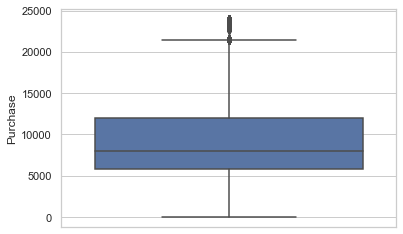

In [26]:
df_Y = pd.DataFrame({"Purchase" : df['Purchase']})
#df = df.drop("Purchase",axis=1)
sns.boxplot(y=df_Y.Purchase)


In [27]:
df.corr()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
Occupation,1.000000,-0.008441,0.007424,0.012623,0.020833,-0.023976
Product_Category_1,-0.008441,1.000000,-0.058544,-0.386535,-0.343703,0.004568
Product_Category_2,0.007424,-0.058544,1.000000,0.092523,0.052288,0.003805
Product_Category_3,0.012623,-0.386535,0.092523,1.000000,0.288501,0.002372
Purchase,0.020833,-0.343703,0.052288,0.288501,1.000000,0.004716
User_ID,-0.023976,0.004568,0.003805,0.002372,0.004716,1.000000


In [28]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,UnderAge,A,F,Not Married,10,3,0,0,P00069042,8370.0,2,1000001
1,UnderAge,A,F,Not Married,10,1,6,14,P00248942,15200.0,2,1000001
2,UnderAge,A,F,Not Married,10,12,0,0,P00087842,1422.0,2,1000001
3,UnderAge,A,F,Not Married,10,12,14,0,P00085442,1057.0,2,1000001
4,VeryOld,C,M,Not Married,16,8,0,0,P00285442,7969.0,4+,1000002


In [29]:
df["Product_ID"].nunique()

3677

In [30]:
df['Product_ID'] = (df['Product_ID'].str.replace('P00', '')).astype(int)

In [31]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,UnderAge,A,F,Not Married,10,3,0,0,69042,8370.0,2,1000001
1,UnderAge,A,F,Not Married,10,1,6,14,248942,15200.0,2,1000001
2,UnderAge,A,F,Not Married,10,12,0,0,87842,1422.0,2,1000001
3,UnderAge,A,F,Not Married,10,12,14,0,85442,1057.0,2,1000001
4,VeryOld,C,M,Not Married,16,8,0,0,285442,7969.0,4+,1000002


In [32]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace({'0':"Less Than 1","1":"One",
                                                                             "2":"Two","3":"Three","4+":"Greater Than 4"})

In [34]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,UnderAge,A,F,Not Married,10,3,0,0,69042,8370.0,Two,1000001
1,UnderAge,A,F,Not Married,10,1,6,14,248942,15200.0,Two,1000001
2,UnderAge,A,F,Not Married,10,12,0,0,87842,1422.0,Two,1000001
3,UnderAge,A,F,Not Married,10,12,14,0,85442,1057.0,Two,1000001
4,VeryOld,C,M,Not Married,16,8,0,0,285442,7969.0,Greater Than 4,1000002


In [35]:
df['User_ID'] = df['User_ID'] - 1000000

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null object
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null int32
Product_Category_3            783667 non-null int32
Product_ID                    783667 non-null int32
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(1), int32(3), int64(3), object(5)
memory usage: 68.8+ MB


In [37]:
cat_data = df.select_dtypes(exclude = np.number)

In [38]:
num_data = df.select_dtypes(include = np.number)

In [39]:
cat_col_encoded = pd.get_dummies(cat_data)

In [40]:
data_preprocessed = pd.concat([num_data, cat_col_encoded], axis = "columns")

In [41]:
test_preprocessed = data_preprocessed[data_preprocessed["Purchase"].isna()]

In [42]:
test_preprocessed.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,User_ID,Age_Adult,Age_MiddleAge,Age_Old,...,City_Category_C,Gender_F,Gender_M,Marital_Status_Married,Marital_Status_Not Married,Stay_In_Current_City_Years_Greater Than 4,Stay_In_Current_City_Years_Less Than 1,Stay_In_Current_City_Years_One,Stay_In_Current_City_Years_Three,Stay_In_Current_City_Years_Two
0,7,1,11,0,128942,NaN,4,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,17,3,5,0,113442,NaN,9,1,0,0,...,1,0,1,0,1,0,1,0,0,0
2,1,5,14,0,288442,NaN,10,0,1,0,...,0,1,0,1,0,1,0,0,0,0
3,1,4,9,0,145342,NaN,10,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,1,4,5,12,53842,NaN,11,1,0,0,...,1,1,0,0,1,0,0,1,0,0


In [43]:
train_preprocessed = data_preprocessed[data_preprocessed["Purchase"].notna()]

In [44]:
train_preprocessed.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,User_ID,Age_Adult,Age_MiddleAge,Age_Old,...,City_Category_C,Gender_F,Gender_M,Marital_Status_Married,Marital_Status_Not Married,Stay_In_Current_City_Years_Greater Than 4,Stay_In_Current_City_Years_Less Than 1,Stay_In_Current_City_Years_One,Stay_In_Current_City_Years_Three,Stay_In_Current_City_Years_Two
0,10,3,0,0,69042,8370.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,10,1,6,14,248942,15200.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,10,12,0,0,87842,1422.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,10,12,14,0,85442,1057.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,16,8,0,0,285442,7969.0,2,0,0,0,...,1,0,1,0,1,1,0,0,0,0


## Modelling

In [45]:
X = train_preprocessed.drop(columns = "Purchase")

In [46]:
y = train_preprocessed["Purchase"]

In [47]:
std = StandardScaler()
X_std = std.fit_transform(X)

In [48]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [49]:
test_X = test_preprocessed.drop(columns = "Purchase")

In [50]:
test_y = test_preprocessed["Purchase"]

In [88]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
linear.coef_

array([ 6.04003827e+00, -3.45531575e+02,  8.91286271e+00,  1.37896303e+02,
       -2.73940997e-03,  1.05503861e-02, -1.46509550e+01,  8.72095161e+01,
        3.81686529e+02,  5.87074803e+01, -5.08138875e+02,  1.94613385e+02,
       -1.99427080e+02, -2.66615758e+02, -1.19978590e+02,  3.86594348e+02,
       -2.43921121e+02,  2.43921121e+02, -2.62334847e+01,  2.62334847e+01,
        1.05238863e+01, -3.51953594e+01, -2.54925403e+00, -1.75470894e+00,
        2.89754361e+01])

In [90]:
linear.intercept_

10811.219495934463

In [91]:
np.sqrt(np.mean(np.abs(cross_val_score(linear,X,y,cv=20,scoring="neg_mean_squared_error"))))

4618.362308124497

In [92]:
test_pred = linear.predict(test_X)

In [93]:
linear_result = pd.DataFrame(test_pred,columns= ["Purchase"])

In [94]:
sample = pd.read_csv("test.csv")

In [95]:
sample.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [96]:
sample = sample.drop(columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'])

In [97]:
sample["Purchase"] = test_pred

In [98]:
sample.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10438.218843
1,1000009,P00113442,10218.103182
2,1000010,P00288442,8131.926557
3,1000010,P00145342,8824.903385
4,1000011,P00053842,11138.780433


In [99]:
sample.to_csv("linear.csv",index = False)
sample = sample.drop(columns="Purchase")

In [100]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [101]:
def model_fit(model, X, y, test, fileName ):
    model.fit(X,y)
    print("CrossValidation score = ",np.sqrt(np.mean(np.abs(cross_val_score(model,X,y,cv=20,scoring="neg_mean_squared_error")))))
    y_pred = model.predict(X)
    print("Train RMSE  :",np.sqrt(mean_squared_error(y,y_pred)))
    y_test_pred = model.predict(test)
    
    #test_pred_df = pd.DataFrame(y_test_pred,columns= ["Price"])
    sample["Purchase"] = y_test_pred
    
    result = sample

    result.to_csv(fileName,index = False)

In [102]:
model_fit(linear, X, y, test_X, "model_solution.csv" )

CrossValidation score =  4618.362308124497
Train RMSE  : 4615.277080252553


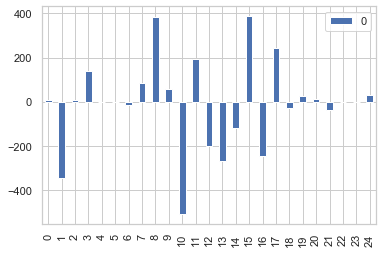

In [103]:
pd.DataFrame(linear.coef_).plot(kind = "bar")

In [104]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
clf = LassoCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1, 10,11,23,100]).fit(X, y)
clf.score(X, y) 

0.15577402126655449

In [105]:
clf.alpha_

0.1

In [106]:
clf.alphas

[0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 23, 100]

In [107]:
elastic = ElasticNet(alpha=0.4,l1_ratio=0.5)

In [108]:
model_fit(elastic, X, y, test_X, "model_elastic_solution.csv" )

CrossValidation score =  4621.6420139606025
Train RMSE  : 4618.649449407311


In [109]:
rid = Ridge(alpha=10,normalize = True)

In [110]:
model_fit(rid, X, y, test_X, "model_ridge_solution.csv" )

CrossValidation score =  4930.234199068313
Train RMSE  : 4928.675395648382


In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
test_X_poly = poly_reg.fit_transform(test_X)

In [ ]:
model_fit(pol_reg, X_poly, y, test_X_poly, "model_poly_solution.csv" )

In [ ]:
las = Lasso(alpha=10,normalize = True)

In [ ]:
model_fit(las, X, y, test_X, "model_lasso_solution.csv" )

In [ ]:

# Validating the model
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)


In [ ]:
# Training using entire data to improve accuracy

xgb_reg.fit(X, y)
predict = xgb_reg.predict(test_X)

sample['Purchase'] = predict
sample.to_csv('model_XGBOOST.csv', index=False)


In [ ]:
sample = sample.drop(columns="Purchase")

In [ ]:
mod = XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=10,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=34
)

In [ ]:
mod.fit(X, y)
predictions = mod.predict(train_X)
rmse = sqrt(mean_squared_error(train_y, predictions))
print("score: {0:,.0f}".format(rmse))

In [ ]:
sample['Purchase'] = rmse
sample.to_csv('model_XGBOOST.csv', index=False)